Dataset a usar: https://drive.google.com/file/d/1C7hJN-p_yZPV8fr5EKakRLpIf5KMz11O/view?usp=sharing

Documentación del dataset: https://www.kaggle.com/datasets/abhinavshaw09/data-science-job-salaries-2024

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parte 1: Cargar el dataset
### a. Modificar el nombre de al menos una columna

In [215]:
salaries = pd.read_csv('dataframes/salaries.csv')
salaries.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,90000,USD,90000,AE,0,AE,L
1,2024,SE,FT,Machine Learning Engineer,180500,USD,180500,US,0,US,M
2,2024,SE,FT,Machine Learning Engineer,96200,USD,96200,US,0,US,M
3,2024,SE,FT,Machine Learning Engineer,235000,USD,235000,AU,0,AU,M
4,2024,SE,FT,Machine Learning Engineer,175000,USD,175000,AU,0,AU,M


In [216]:
salaries.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [217]:
salaries.rename(columns={'salary':'salario'}, inplace=True)

### b. Agregar o eliminar al menos una columna (explicando el por qué de su decisión)

In [218]:
salaries.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salario', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [219]:
salaries.drop(['salario', 'salary_currency'], axis=1, inplace=True)
# Asumiendo que quiero realizar un análisis de empleos con moneda en USD dropeapmos las columnas de salario y salary currency

### c. Reemplazar los valores o algún valor de alguna columna

In [220]:
salaries['employment_type'].replace({'PT':'Part-time', 'FT':'Full-time', 'CT':'Contract', 'FL':'Freelance'}, inplace=True)
salaries['experience_level'].replace({'N':'Entry-level / Junior', 'MI':'Mid-level / Intermediate', 'SE':'Senior-level / Expert', 'EX':'Executive-level / Director'}, inplace=True)

# Parte 2: Contestar las siguientes preguntas de forma gráfica y analítica:

### a. ¿Hay datos nulos, duplicados o outliers? En caso de haber, decidan qué hacer con ellos y expliquen su decisión.

##### Nulos & Duplicados

``` python
def validate_columns(df):
    summary_df = df.describe(include='all').T
    summary_df['Num_Null_Values'] = df.isnull().sum()
    summary_df['%_Null_Values'] = (summary_df['Num_Null_Values'] / len(df)) * 100
    sample_unique_values = df.sample(min(5, len(df)), axis=0).T
    summary_df['Sample_Unique_Values'] = sample_unique_values.values.tolist()
    summary_df = summary_df.rename(columns={'unique': 'Unique_Values', 'count': 'Num_Unique_Values'})
    summary_df = summary_df[['Unique_Values', 'Num_Unique_Values', 'Num_Null_Values', '%_Null_Values', 'Sample_Unique_Values']]
    return summary_df
```

In [221]:
from funciones.funciones_repaso import validate_columns
validate_columns(salaries)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
work_year,NaN,13972.0,0,0.0,"[2023, 2023, 2023, 2023, 2024]"
experience_level,4,13972,0,0.0,"[Senior-level / Expert, Senior-level / Expert,..."
employment_type,4,13972,0,0.0,"[Full-time, Full-time, Full-time, Full-time, F..."
job_title,146,13972,0,0.0,"[Machine Learning Engineer, Data Scientist, Re..."
salary_in_usd,NaN,13972.0,0,0.0,"[190000, 180000, 160000, 62500, 250000]"
employee_residence,88,13972,0,0.0,"[US, US, US, US, US]"
remote_ratio,NaN,13972.0,0,0.0,"[100, 100, 0, 100, 0]"
company_location,77,13972,0,0.0,"[US, US, US, US, US]"
company_size,3,13972,0,0.0,"[M, M, M, M, M]"


In [222]:
salaries.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

##### Outliers

``` python
def plot_outliers(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).shape[1]
    num_rows = (num_cols - 1) // 2 + 1
    fig, axs = plt.subplots(num_rows, 2, figsize=(20, 5*num_rows))
    axs = axs.flatten()
    for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
        box = axs[i].boxplot(df[col], patch_artist=True, boxprops=dict(facecolor='#336fa2'), medianprops=dict(color='black'))
        for patch in box['fliers']:
            patch.set_markerfacecolor('black')
            patch.set_markeredgecolor('black')
        axs[i].set_title(col)
    plt.tight_layout()
    plt.show()
```

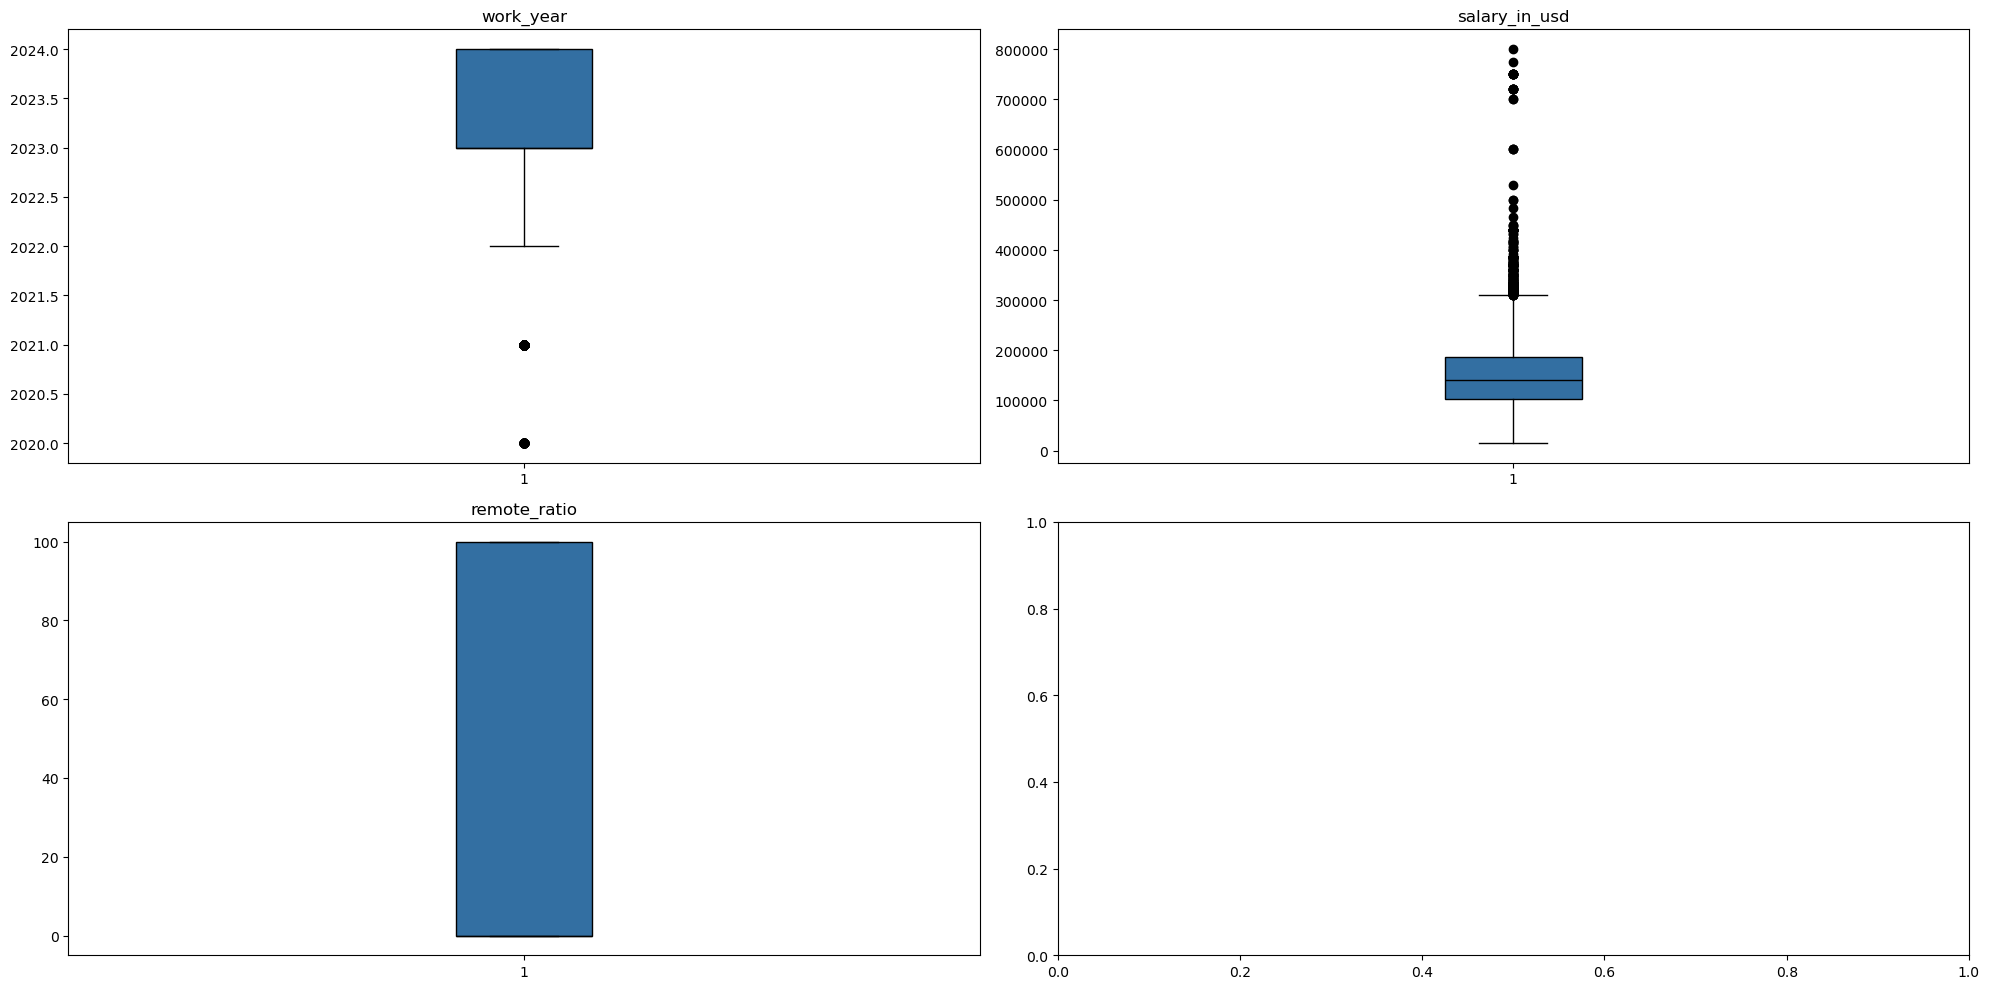

In [223]:
from funciones.funciones_repaso import plot_outliers
plot_outliers(salaries)

``` python
def reconocimiento_de_outliers(df, column, scale_factor=1.5):
    data = df[column]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - scale_factor * iqr
    upper_bound = q3 + scale_factor * iqr
    
    outliers = (data < lower_bound) | (data > upper_bound)
    outlier_values = data[outliers]

    print(f"Outliers de {column}:")
    print(outlier_values)
    
    return outliers, outlier_values
```

In [ ]:
# from funciones.funciones_repaso import reconocimiento_de_outliers

# outliers_salary_usd, outliers_salary_usd = reconocimiento_de_outliers(salaries, "salary_in_usd", 1.5)


Outliers de salary_in_usd:
63       600000
65       600000
73       500000
103      334075
129      333500
          ...  
13754    450000
13899    416000
13918    325000
13964    423000
13967    412000
Name: salary_in_usd, Length: 253, dtype: int64


In [225]:
salaries.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [226]:
from funciones.funciones_repaso import remove_outliers

salaries = remove_outliers(salaries, "salary_in_usd", outliers_salary_usd)

##### Si bien hay salarios que se presentan como outliers luego de haber realizado el grafico del boxplot mediante la funcion previamente definida, considero que NO hay que removerlos ya que los mismos son valores reales y no errores en la carga de datos.

### b. ¿Cuántos título de trabajo únicos hay? ¿Cuál es el tipo de trabajo más usual por seniority?

In [227]:
titulo_trabajo_unico = salaries['job_title'].nunique()
print(f'Hay {titulo_trabajo_unico} títulos de trabajo únicos')

Hay 144 títulos de trabajo únicos


### c. ¿Es verdad que los trabajadores de compañias grandes ganan más?

In [228]:
salaries.groupby("company_size").agg({"salary_in_usd":"sum"}).sort_values(by="company_size", ascending=False).reset_index()

,company_size,salary_in_usd
0,S,15100913
1,M,1853538590
2,L,129581873


### d. ¿Es verdad que las personas que trabajan en una compañía de su mismo país tienen un salario mayor que los trabajadores internacionales?

In [229]:
personas_mismo_pais_company = salaries[salaries['employee_residence'] == salaries['company_location']]
personas_mismo_pais_company[['salary_in_usd', 'employee_residence', 'company_location']]

,salary_in_usd,employee_residence,company_location
0,90000,AE,AE
1,180500,US,US
2,96200,US,US
3,235000,AU,AU
4,175000,AU,AU
...,...,...,...
13966,165000,US,US
13968,151000,US,US
13969,105000,US,US
13970,100000,US,US


In [230]:
salario_personas_mismo_pais_company = personas_mismo_pais_company["salary_in_usd"].mean().__round__(2)
print(f'El salario promedio de las personas que trabajan en el mismo país que la empresa es de U$D {salario_personas_mismo_pais_company}')

El salario promedio de las personas que trabajan en el mismo país que la empresa es de U$D 146320.59


In [231]:
personas_no_mismo_pais_company = salaries[salaries['employee_residence'] != salaries['company_location']]
personas_no_mismo_pais_company[['salary_in_usd', 'employee_residence', 'company_location']]

,salary_in_usd,employee_residence,company_location
1978,27000,IN,AS
2882,63333,HR,HU
5156,50000,CZ,CA
5159,21000,PK,LU
5212,25000,UA,NL
...,...,...,...
13939,60000,RU,US
13947,18053,IN,AS
13949,62726,FR,LU
13960,130800,ES,US


In [232]:
salario_personas_no_mismo_pais_company = personas_no_mismo_pais_company["salary_in_usd"].mean().__round__(2)
print(f'El salario promedio de las personas que trabajan en el mismo país que la empresa es de U$D {salario_personas_no_mismo_pais_company}')

El salario promedio de las personas que trabajan en el mismo país que la empresa es de U$D 73694.93


# Parte 3: En base a la información presente en este dataset, planteen una hipótesis y compruebenla. Utilicen al menos un gráfico para demostrarlo.

##### Podemos asumir que el salario en el año 2020 en promedio fue menor debido a la pandemia

In [233]:
avg_salaries_per_year = salaries.groupby("work_year").agg({"salary_in_usd":"mean"}).sort_values(by="work_year").reset_index()
avg_salaries_per_year

,work_year,salary_in_usd
0,2020,90025.208333
1,2021,96963.018519
2,2022,133131.442483
3,2023,150292.844373
4,2024,144545.862716


<Figure size 1000x600 with 0 Axes>

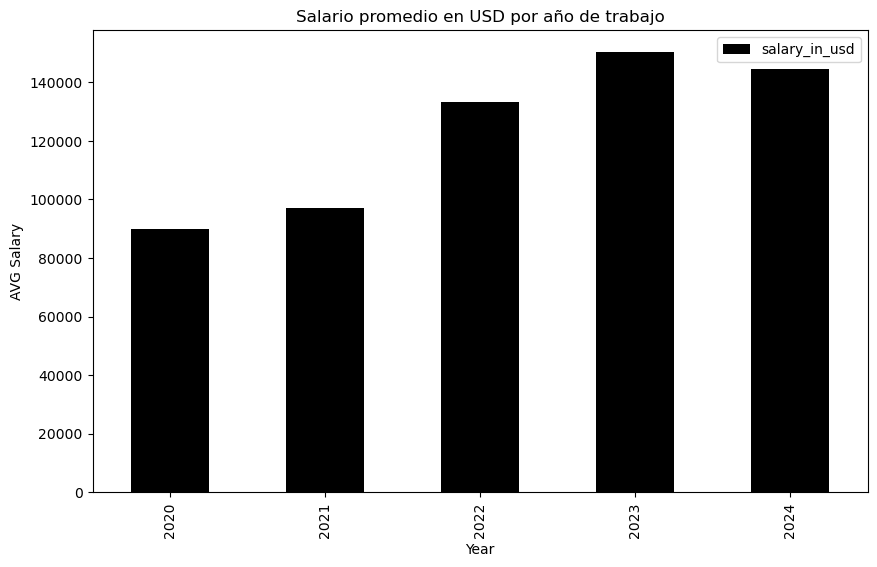

<Figure size 1000x600 with 0 Axes>

In [244]:
avg_salaries_per_year.plot(kind='bar', x='work_year', y='salary_in_usd', color='black', figsize=(10, 6))
plt.xlabel("Year"), plt.ylabel("AVG Salary"), plt.title('Salario promedio en USD por año de trabajo')
plt.figure(figsize=(10, 6))

